In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
time: 2.37 s (started: 2023-02-20 02:05:01 +00:00)


# Loading the data

For the remainder of this notebook, we will explore/present/analyze the datasets in order of first kidney disease, then white wine quality.

In [ ]:
# to measure runtime of cells
!pip install ipython-autotime
%load_ext autotime

# for data viz and model
import seaborn as sns
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.6 MB/s eta 0:00:00
time: 898 ms (started: 2023-02-20 02:04:17 +00:00)


In [ ]:
# load datasets
ww = pd.read_csv("/content/gdrive/MyDrive/White_wine Quality.csv", header=None)
kd = pd.read_csv("/content/gdrive/MyDrive/Kidney disease.csv", header=None)
kd.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'HeartRate', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'label']
ww.columns = ['Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue', 'label']


time: 803 ms (started: 2023-02-20 02:05:55 +00:00)


In [ ]:
ww_data = ww.values
count = 0
for sample in ww_data[:,-1]:
  if sample == 0.0:
    count += 1

time: 1.76 ms (started: 2023-02-20 02:06:44 +00:00)


In [ ]:
print(count)
print(1599-count)

744
855
time: 728 µs (started: 2023-02-20 02:06:45 +00:00)


In [ ]:
kd

,Pregnancies,Glucose,BloodPressure,HeartRate,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
0,0.294120,0.79397,0.68852,0.414140,0.248230,0.58718,0.135350,0.133330,0.46154,1
1,0.176470,0.53769,0.50820,0.131310,0.056738,0.34128,0.256190,0.033333,0.52308,1
2,0.235290,0.54774,0.52459,0.444440,0.117020,0.51863,0.353120,0.083333,0.52308,1
3,0.235290,0.74372,0.49180,0.272730,0.375890,0.46051,0.030743,0.133330,0.27692,1
4,0.470590,0.98492,0.62295,0.292930,0.330970,0.55887,0.225020,0.600000,0.63077,1
...,...,...,...,...,...,...,...,...,...,...
325,0.058824,0.54774,0.49180,0.080808,0.215130,0.37854,0.371050,0.000000,0.44615,0
326,0.058824,0.45226,0.50820,0.181820,0.069740,0.37407,0.508110,0.066667,0.52308,0
327,0.058824,0.62814,0.57377,0.242420,0.130020,0.36215,0.061059,0.066667,0.29231,0
328,0.058824,0.59799,0.44262,0.131310,0.059102,0.33234,0.054227,0.050000,0.29231,0


time: 34.2 ms (started: 2023-02-19 01:55:15 +00:00)


In [ ]:
ww

,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Hue,label
0,0.28319,0.28082,0.04,0.054795,0.106840,0.225350,0.088339,0.46442,0.46457,0.137720,1
1,0.19469,0.34932,0.07,0.082192,0.128550,0.140850,0.134280,0.38371,0.57480,0.131740,1
2,0.30088,0.20548,0.17,0.075342,0.101840,0.070423,0.042403,0.52311,0.43307,0.167660,1
3,0.30088,0.20548,0.17,0.075342,0.101840,0.070423,0.042403,0.52311,0.43307,0.167660,1
4,0.24779,0.34247,0.05,0.068493,0.093489,0.323940,0.127210,0.44241,0.53543,0.143710,1
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.19469,0.32192,0.10,0.054795,0.085142,0.464790,0.166080,0.42040,0.52756,0.203590,0
1595,0.18584,0.63014,0.08,0.095890,0.091820,0.253520,0.091873,0.47029,0.61417,0.143710,0
1596,0.23894,0.58904,0.05,0.082192,0.081803,0.267610,0.151940,0.51211,0.44882,0.131740,0
1597,0.47788,0.39041,0.11,0.034247,0.120200,0.098592,0.063604,0.41893,0.11024,0.083832,0


time: 32 ms (started: 2023-02-19 01:55:19 +00:00)


# Data exploration

### Distribution of classes

In [ ]:
# organization of kidney dataset
kd_data = kd.values
kdx = kd_data[:, :-1]
kdy = kd_data[:,-1]
kd_zero = kd_data[kd_data[:, -1] == 0]
kd_one = kd_data[kd_data[:, -1] == 1]

# organization of white wine dataset
ww_data = ww.values
wwx = ww_data[:, :-1]
wwy = ww_data[:,-1]
ww_zero = ww_data[ww_data[:, -1] == 0]
ww_one = ww_data[ww_data[:, -1] == 1]

time: 2.55 ms (started: 2023-02-20 02:06:49 +00:00)


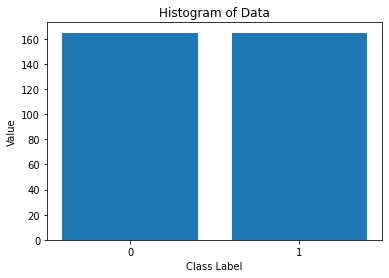

time: 484 ms (started: 2023-02-19 15:55:44 +00:00)


In [ ]:
plt.bar([0, 1], [kd_zero.shape[0], kd_one.shape[0]], align='center')
plt.xlabel('Class Label')
plt.ylabel('Value')
plt.title('Histogram of Data')
plt.xticks([0, 1], ['0', '1'])
plt.show()

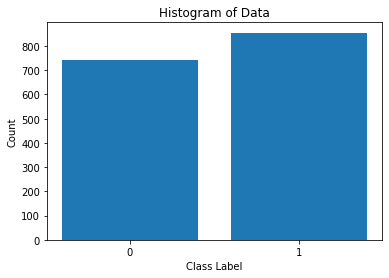

time: 254 ms (started: 2023-02-19 15:55:47 +00:00)


In [ ]:
plt.bar([0, 1], [ww_zero.shape[0], ww_one.shape[0]], align='center')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Histogram of Data')
plt.xticks([0, 1], ['0', '1'])
plt.show()

### Heatmaps of Features

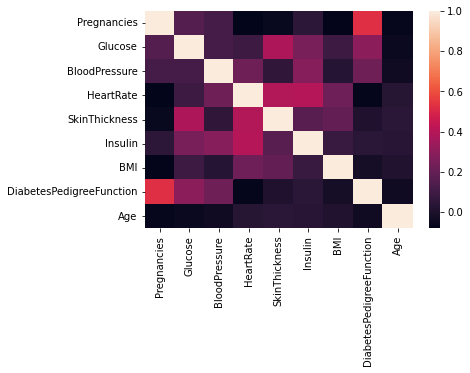

time: 260 ms (started: 2023-02-19 15:55:50 +00:00)


In [ ]:
kd_x = kd.drop('label', axis=1)
sns.heatmap(kd_x.corr())

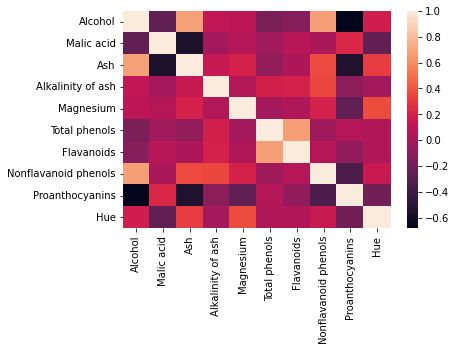

time: 268 ms (started: 2023-02-19 15:55:53 +00:00)


In [ ]:
ww_x = ww.drop('label', axis=1)
sns.heatmap(ww_x.corr())

### Distributions of Samples Across Features

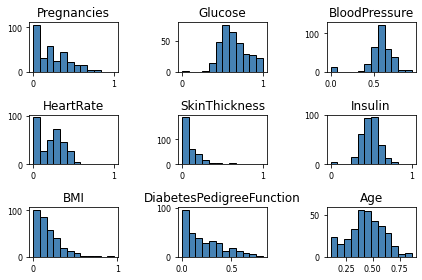

time: 3.28 s (started: 2023-02-19 02:04:54 +00:00)


In [ ]:
kd_x.hist(bins=12,color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0,0,1,1))

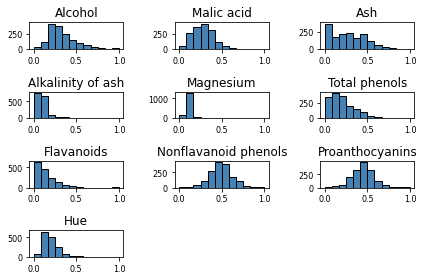

time: 1.67 s (started: 2023-02-19 02:04:57 +00:00)


In [ ]:
ww_x.hist(bins=12,color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0,0,1,1))

### Pairwise Comparisons of Features

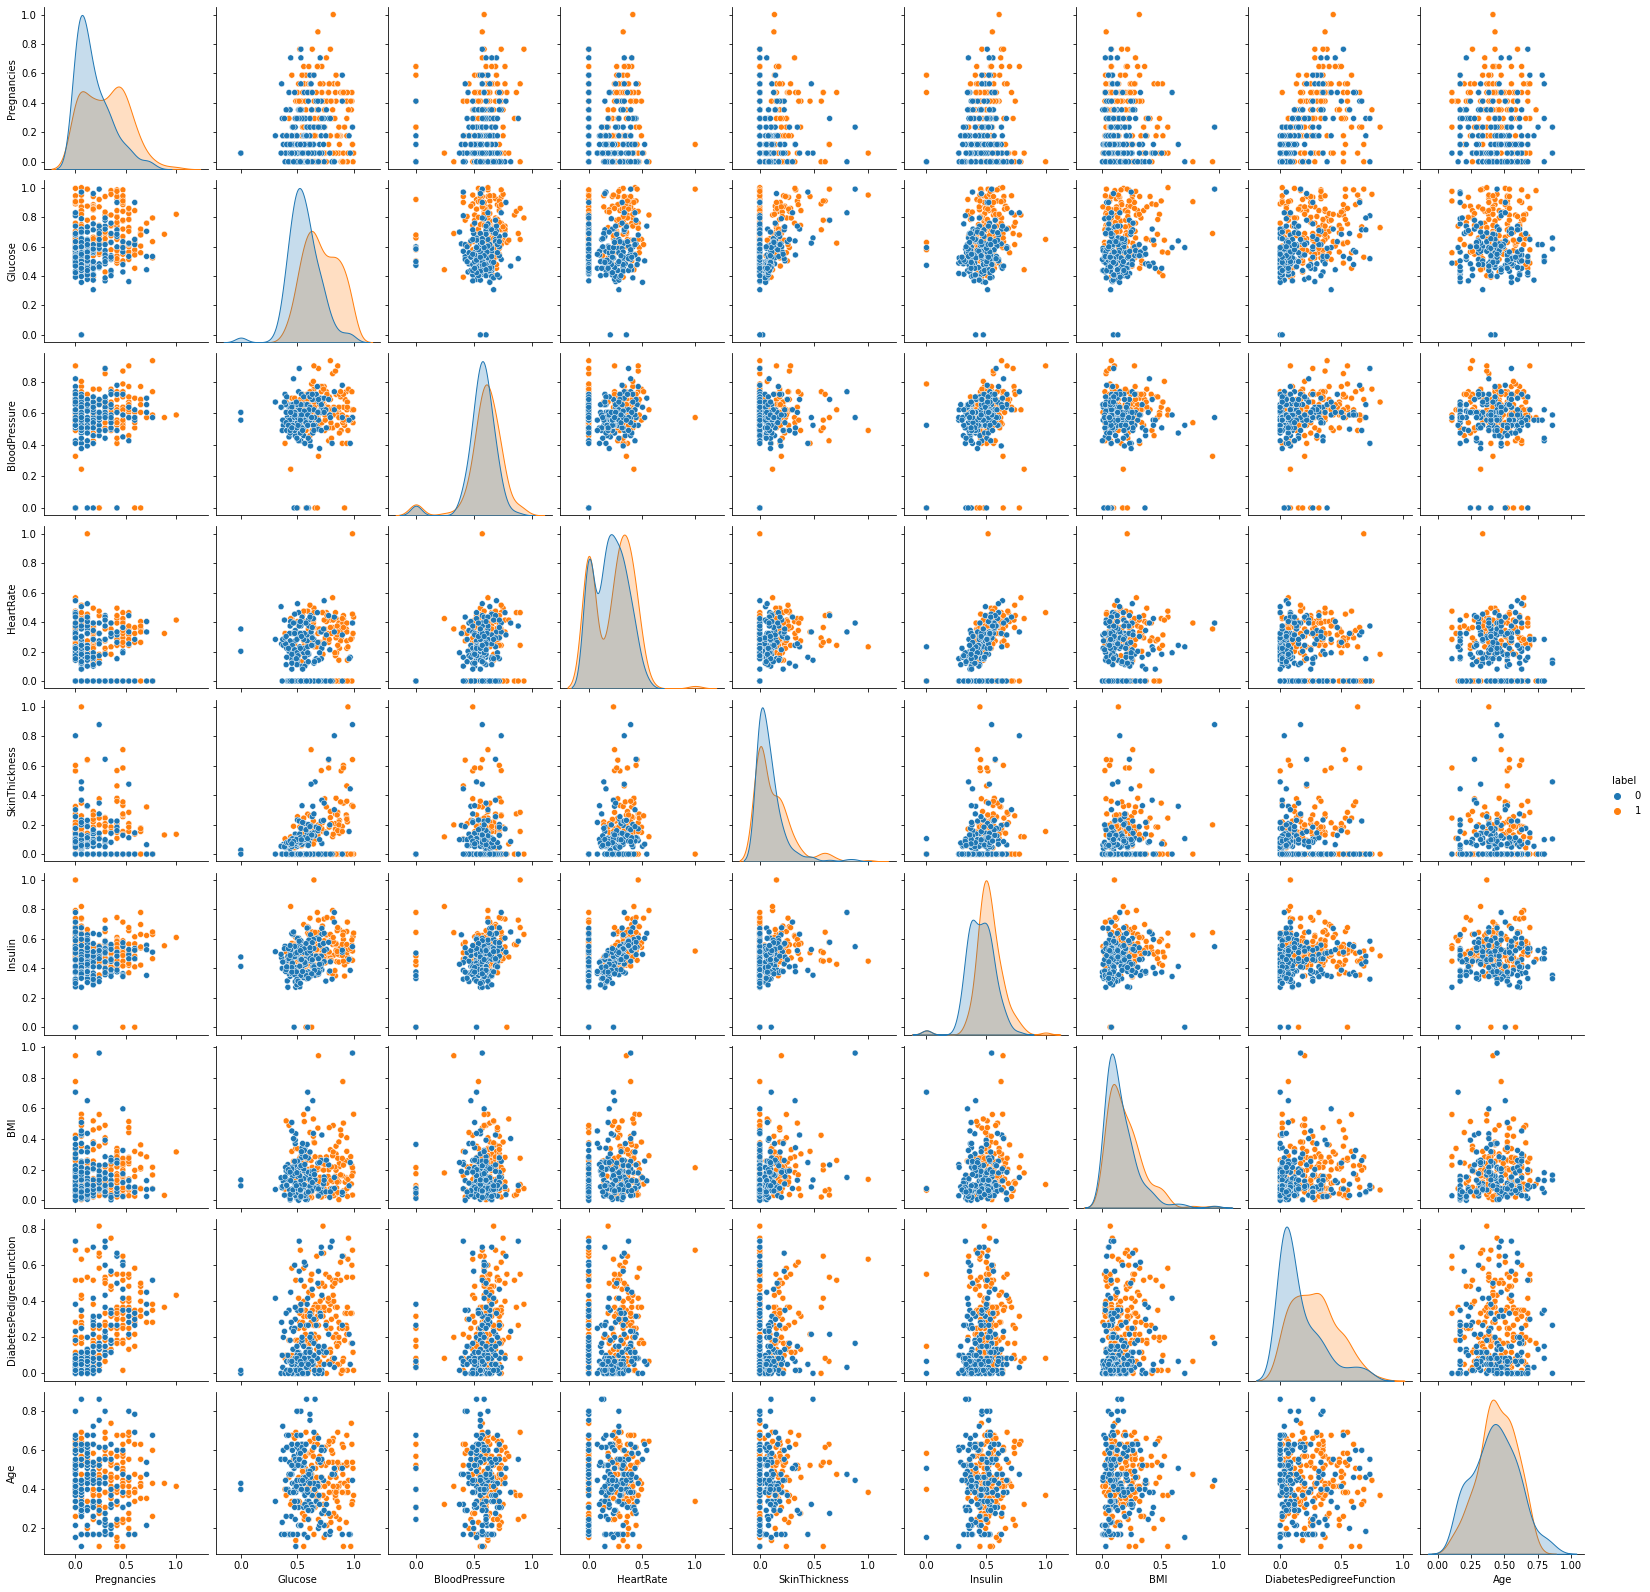

time: 42.5 s (started: 2023-02-15 20:52:58 +00:00)


In [ ]:
sns.pairplot(kd[:-1],hue='label')

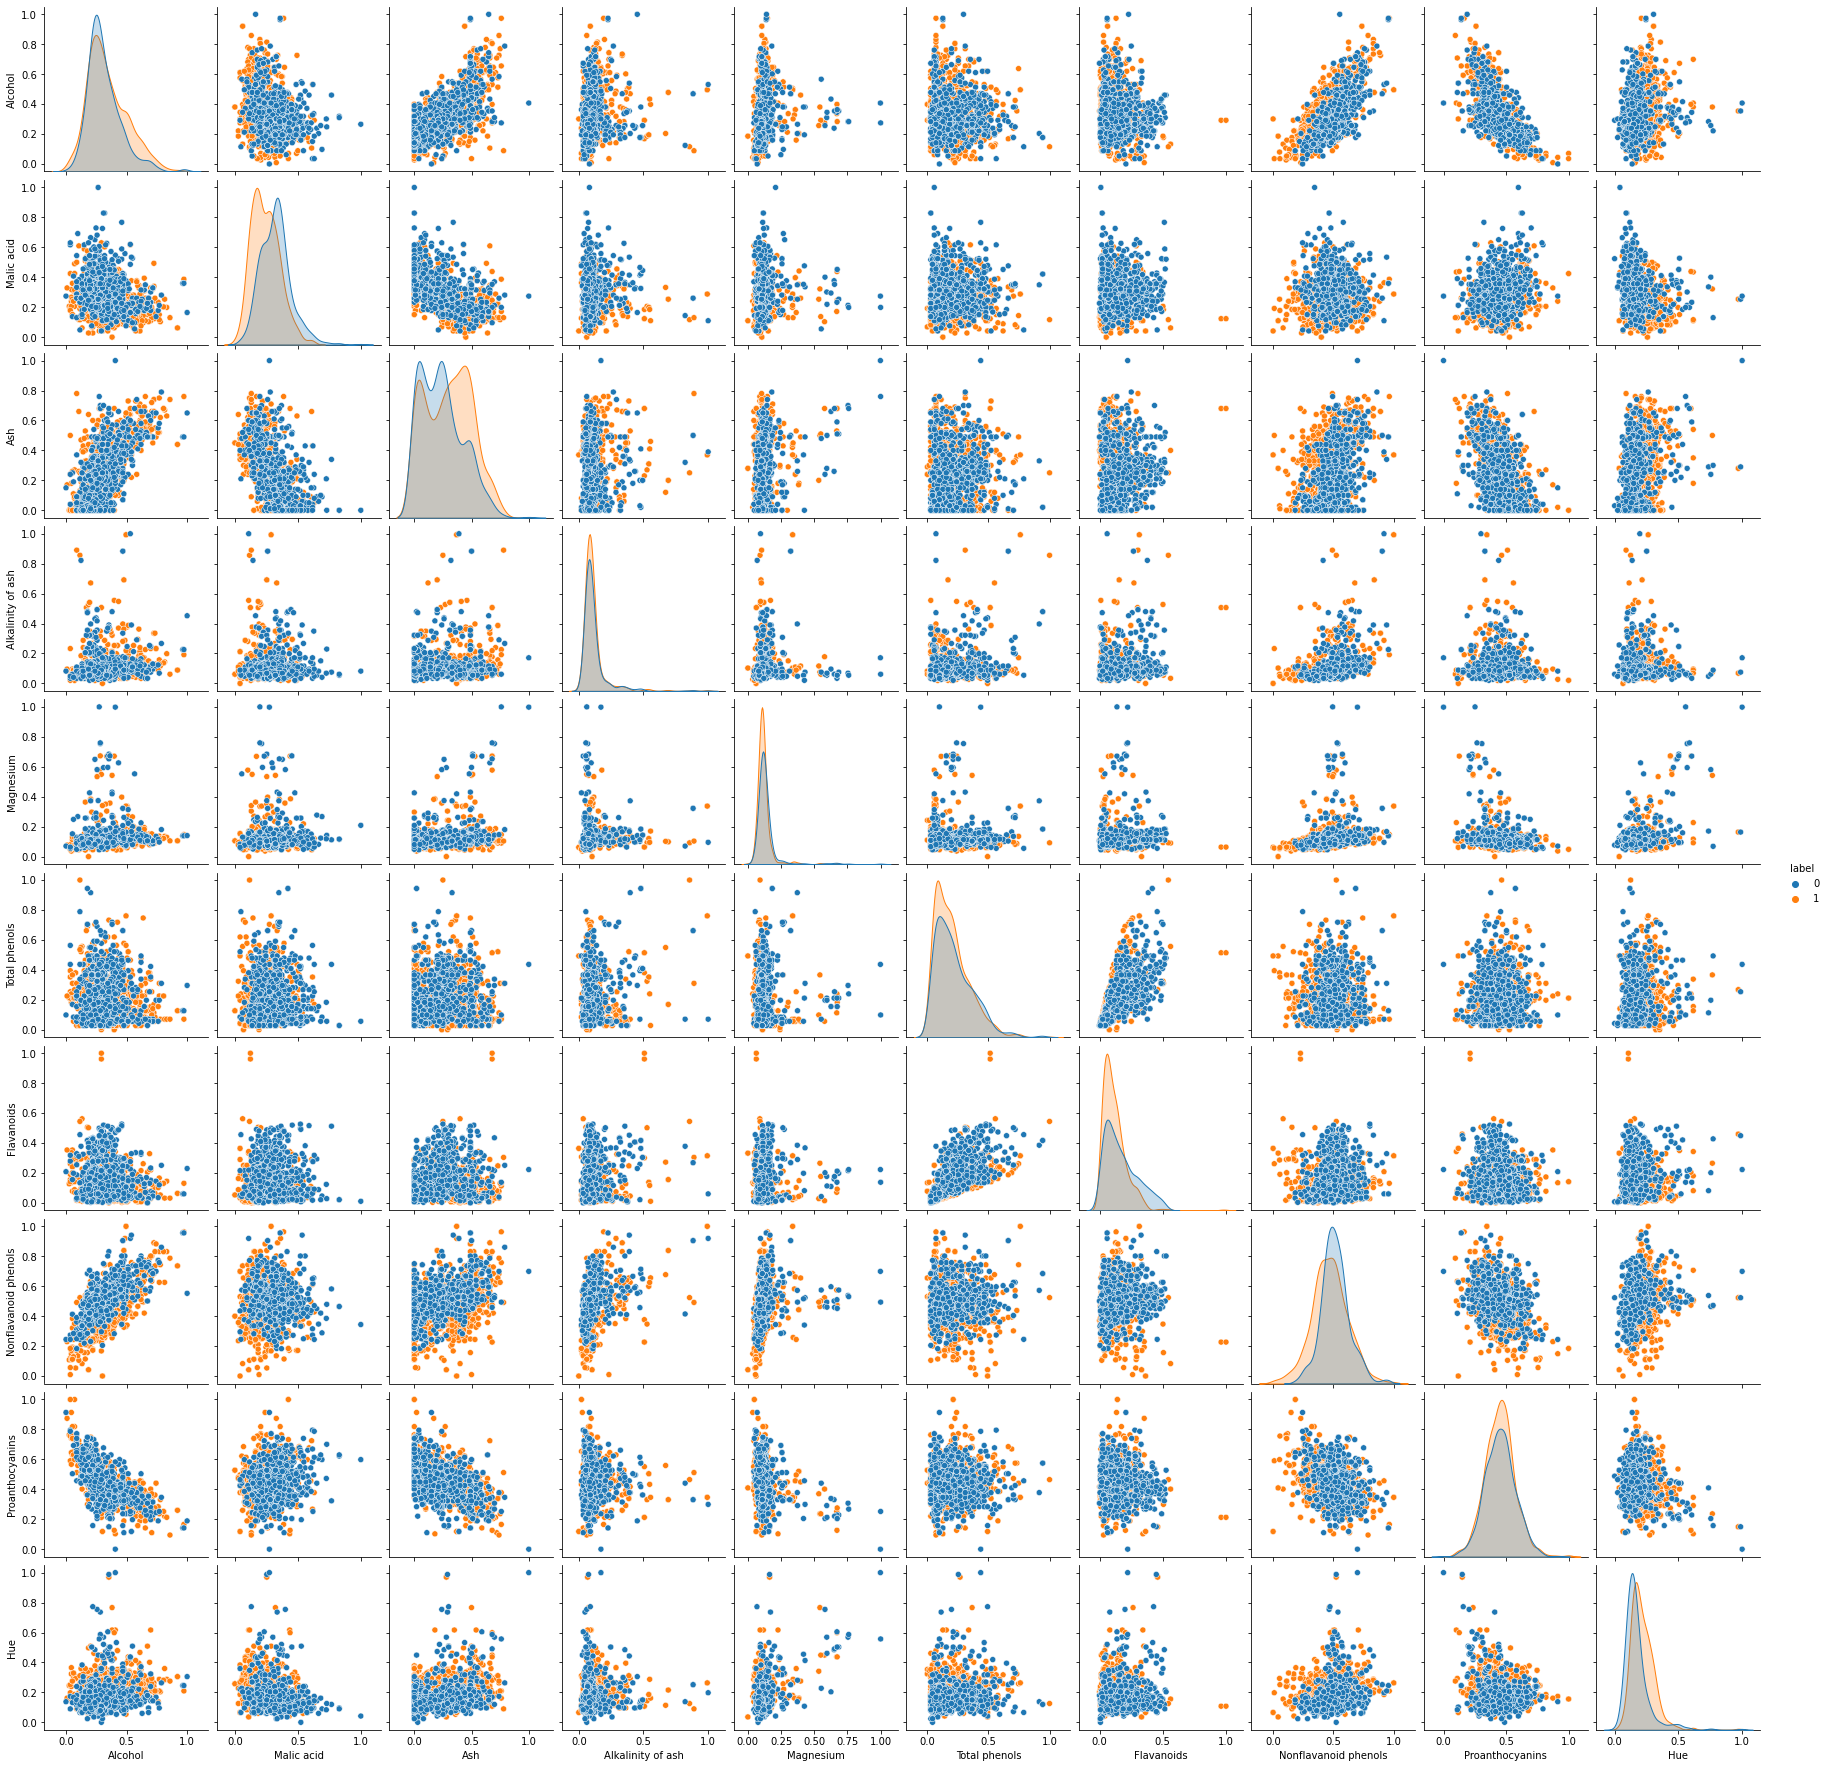

time: 1min 10s (started: 2023-02-15 21:56:56 +00:00)


In [ ]:
sns.pairplot(ww[:-1],hue='label')

# Implementing Logistic Regression

## Logistic Regression Class

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))

class LogisticRegression:

    def __init__(self, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False, draw_loss = True):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.w = None                   #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.draw_loss = draw_loss
        self.t = 0       #num of iterations

    def cost_fn(self, x, y, w):
        N, D = x.shape
        z = np.dot(x, w)
        J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies
        return J

    def gradient(self, x, y):
        N = x.shape[0]
        yh = logistic(np.dot(x, self.w))
        g = np.dot(x.T, (yh - y)) / N
        return g

    def fit(self, x, y, lr):
        N = x.shape[0]
        x = np.column_stack([x,np.ones(N)])
        self.learning_rate = lr
        loss = []
        D = x.shape[1]
        self.w = np.zeros(D)
        g = np.inf
        self.t = 1
        while np.linalg.norm(g) > self.epsilon and self.t < self.max_iters:
          g= self.gradient(x, y)
          self.w = self.w - self.learning_rate * g
          loss.append(self.cost_fn(x, y, self.w))
          self.t += 1

        if self.draw_loss:
          iter = range(1,self.t)
          plt.plot(list(iter), loss, '-r')
          plt.title("Loss Function")
          plt.xlabel("# of Iterations")
          plt.ylabel("Cross-Entropy Loss")
        # the code snippet below is for gradient descent
        if self.verbose:
            print(f'terminated after {self.t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {repr(self.w)}')


    def predict(self, x):
        Nt = x.shape[0]
        x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        yh[yh >= 0.5] = 1
        yh[yh < 0.5] = 0
        return yh

# LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

time: 3.61 ms (started: 2023-02-20 02:06:55 +00:00)


## Method to evaluate accuracy

In [ ]:
""" takes the predicted labels and the true labels as input and outputs the
accuracy score. """
def Accu_eval(y, yh):
    correct = 0
    for i in range(len(y)):
        if y[i] == yh[i]:
            correct += 1
    return correct / len(y)

time: 1.08 ms (started: 2023-02-20 02:07:12 +00:00)


## Method to split train and test dataset

In [ ]:
# Train test split

def train_test_split(df, train_size=0.7, shuffle=True):
  if shuffle:
    df_shuffled = df.sample(frac=1, random_state=42)
  else:
    df_shuffled = df
  split = int(train_size * len(df))

  # Split your dataset
  train_set = df_shuffled[:split]
  test_set = df_shuffled[split:]
  return train_set, test_set

time: 1.32 ms (started: 2023-02-20 01:32:20 +00:00)


# Training the model using 10-fold cross validation, using all (unmodified) features

##KFoldCV Class

In [ ]:
# K-fold cross validation class
class KFoldCV:
    def __init__(self, k=10):
        self.k = k

    def Accu(self, kdx1, kdy, y=None):
        fold_size = kdx1.shape[0]//self.k
        scores = []

        # Loop over the folds
        for i in range(self.k):
            # Split the data into training and validation sets
            X_train = np.concatenate((kdx1[:i*fold_size, :], kdx1[(i+1)*fold_size:, :]), axis=0)
            y_train = np.concatenate((kdy[:i*fold_size], kdy[(i+1)*fold_size:]), axis=0)
            X_val = kdx1[i*fold_size:(i+1)*fold_size, :]
            y_val = kdy[i*fold_size:(i+1)*fold_size]

            # Train your model on the training data
            model = LogisticRegression(verbose=True, max_iters = 1e5, draw_loss = False)
            model.fit(X_train, y_train, .1)
            y_pred = model.predict(X_val)
            score = Accu_eval(y_val, y_pred) # look at error metrics, not loss
            scores.append(score)

        # print(X_train)
        # Calculate the average accuracy score across all folds
        avg_score = np.mean(scores)
        print(scores)
        print('Average accuracy:', avg_score)

time: 3.89 ms (started: 2023-02-20 02:06:27 +00:00)


### Splitting Data and Training Model

In [ ]:
# Divide kd into train and test datasets
train_kd, test_kd = train_test_split(kd)

train_kd_x = train_kd.iloc[:,:-1].to_numpy()
train_kd_y = train_kd.iloc[:,-1].to_numpy()
test_kd_x = test_kd.iloc[:,:-1].to_numpy()
test_kd_y = test_kd.iloc[:,-1].to_numpy()


time: 7.7 ms (started: 2023-02-20 01:32:27 +00:00)


In [ ]:
# Divide ww into train and test datasets
train_ww, test_ww = train_test_split(ww)

train_ww_x = train_ww.iloc[:,:-1].to_numpy()
train_ww_y = train_ww.iloc[:,-1].to_numpy()
test_ww_x = test_ww.iloc[:,:-1].to_numpy()
test_ww_y = test_ww.iloc[:,-1].to_numpy()

time: 5.05 ms (started: 2023-02-20 01:32:28 +00:00)


##10-fold cross validation for Kidney Disease

In [ ]:
# BASELINE FOR KIDNEY DATASET
kcv = KFoldCV()
kcv.Accu(train_kd_x, train_kd_y)

terminated after 44814 iterations, with norm of the gradient equal to 9.999667560520388e-05
the weight found: array([ 1.53629603,  7.33892209, -1.87648081,  0.77883952, -3.59878799,
        6.62662938,  1.16798855,  1.94816366,  1.01707488, -8.12099704])
terminated after 43338 iterations, with norm of the gradient equal to 9.999786546084284e-05
the weight found: array([ 1.43784699,  7.73402015, -1.93646791, -0.17266021, -3.07624753,
        5.81929205,  1.65635189,  2.0577941 ,  1.26549269, -7.77282856])
terminated after 48576 iterations, with norm of the gradient equal to 9.999807487469523e-05
the weight found: array([ 0.97743483,  8.25475388, -2.78983195,  0.41010283, -3.88666498,
        6.42065539,  1.26677931,  2.91599247,  1.3068168 , -8.16013148])
terminated after 42432 iterations, with norm of the gradient equal to 9.999295890108791e-05
the weight found: array([ 1.3131793 ,  7.88161611, -1.98024331, -0.0531525 , -2.9405402 ,
        5.91538399,  1.65119757,  2.05939647,  0.2953

##10-fold cross validation for white wine quality

In [ ]:
# BASELINE FOR WINE DATASET
kcv = KFoldCV()
kcv.Accu(train_ww_x, train_ww_y)

terminated after 82884 iterations, with norm of the gradient equal to 9.9998054207031e-05
the weight found: array([ 5.78561493, -3.91867262, -0.3853835 ,  3.58441436, -3.38627024,
        1.660343  , -6.29373771, -6.80776044,  3.27005417,  6.99671574,
        0.63942019])
terminated after 80276 iterations, with norm of the gradient equal to 9.999990741734462e-05
the weight found: array([ 5.23523158, -4.27522651, -0.44887768,  3.85715887, -3.40201436,
        1.35736367, -6.08966925, -6.81034866,  2.57034035,  6.9836231 ,
        1.26883668])
terminated after 95718 iterations, with norm of the gradient equal to 9.999767858853844e-05
the weight found: array([ 6.37365754, -4.34804651, -0.23442349,  4.15977369, -2.91069227,
        2.0672803 , -6.61914333, -7.44374657,  3.62461764,  6.72914501,
        0.61474668])
terminated after 89383 iterations, with norm of the gradient equal to 9.999943984898585e-05
the weight found: array([ 5.82683839, -4.19533869, -0.57760875,  3.80126052, -2.86071

# Exploring how to improve accuracy

We have trained and evaluated the model using all features. Methods to possibly improve the model's performance is by training it on a subset of features and by adding features.

### Training on a Subset of Features

To choose our subset of features, we will try the following approaches:

1. First, we can try dropping the feature with the minimum absolute weight. The motivation for this is that the small magnitude of the weight suggests it is "unimportant" in predicting the class.

2. Similarly, what if we drop half the features corresponding to the lowest weights? We can try fitting the model and dropping the lowest weight n/2 times, where n/2 corresponds to number of features.

3. We can try dropping a feature (say, X) that is highly correlated to another feature; the motivation for this is that the high correlation may be an indication that X behaves similarly to another feature and so X may be redundant.

4. We will see that method 2 in fact leads to similar performance as our baseline for both datasets. This is perhaps unsurprising since our guess as to which feature is unimportant is a naive guess. What if we allow a proper algorithm to decide what features to exclude? This is called recursive feature elimination (RFE), which we can also try.

### Training with an Added Feature

5. There are several ways to modify our existing features to create new ones. As discussed in lecture, there's a transformation of variables, basis expansions, interaction terms, etc. We will implement basis exapnsion on the features corresponding to the 3 highest weights by squaring them.

### Method 1: Feature selection by dropping the feature with minimum absolute weight

In [ ]:
# looking at weights found (kd)
# note: the last weight corresponds to the bias

t1_kd = [ 1.53629603,  7.33892209, -1.87648081,  0.77883952, -3.59878799,
        6.62662938,  1.16798855,  1.94816366,  1.01707488, -8.12099704]
t2_kd = [ 1.43784699,  7.73402015, -1.93646791, -0.17266021, -3.07624753,
        5.81929205,  1.65635189,  2.0577941 ,  1.26549269, -7.77282856]
t3_kd = [ 0.97743483,  8.25475388, -2.78983195,  0.41010283, -3.88666498,
        6.42065539,  1.26677931,  2.91599247,  1.3068168 , -8.16013148]
t4_kd = [ 1.3131793 ,  7.88161611, -1.98024331, -0.0531525 , -2.9405402 ,
        5.91538399,  1.65119757,  2.05939647,  0.29537482, -7.75338933]
t5_kd = [ 1.31737927,  8.07087655, -2.13574204, -0.66730199, -3.1404344 ,
        6.90332233,  0.69198453,  2.11539886,  2.21029614, -8.64806691]
t6_kd = [ 1.18270513,  7.35536494, -1.01884386, -1.24406865, -1.82567872,
        8.59982715,  0.9155901 ,  1.791145  ,  1.49093836, -9.40604657]
t7_kd = [ 1.78670983,  7.15878076, -2.24891079, -0.89727531, -1.8992629 ,
        6.76446113,  1.71323425,  1.66006706,  0.81547492, -7.50436839]
t8_kd = [ 1.0965183 ,  7.596557  , -2.00063344, -0.24884742, -2.84522624,
        5.4682251 ,  0.72438791,  2.59416841,  1.35843053, -7.51127707]
t9_kd = [ 1.83327196,  7.78314171, -1.78111911,  0.41933386, -3.24022504,
        6.06762844,  0.75599962,  1.06106402,  1.08232023, -7.97771431]
t10_kd = [ 2.25353811,  7.66945731, -1.95468149, -0.0587181 , -2.74247079,
        5.90721699,  0.71970292,  1.92364645,  1.10501868, -7.81619395]

ts_kd = [t1_kd, t2_kd, t3_kd, t4_kd, t5_kd, t6_kd, t7_kd, t8_kd, t9_kd, t10_kd]
for trial in ts_kd:
   print(trial.index(min(trial, key=abs)))

3
3
3
3
3
6
8
3
3
3
time: 8.67 ms (started: 2023-02-20 01:38:35 +00:00)


In [ ]:
# we see that the feature in index 3 is most commonly smallest (recall last weight is the bias)
train_kd # let's see which feature this is

,Pregnancies,Glucose,BloodPressure,HeartRate,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
9,0.705880,0.75879,0.57377,0.40404,0.320330,0.62295,0.283520,0.283330,0.35385,1
164,0.647060,0.67839,0.00000,0.00000,0.000000,0.77943,0.213490,0.316670,0.63077,1
139,0.000000,0.56784,0.62295,0.00000,0.000000,0.49627,0.085397,0.033333,0.26154,1
46,0.058824,0.83920,0.60656,0.17172,0.170210,0.34873,0.157560,0.200000,0.35385,1
94,0.352940,0.74372,0.59016,0.35354,0.000000,0.50075,0.234420,0.483330,0.41538,1
...,...,...,...,...,...,...,...,...,...,...
61,0.235290,0.62814,0.65574,0.00000,0.000000,0.48137,0.195560,0.100000,0.47692,1
150,1.000000,0.81910,0.59016,0.41414,0.134750,0.60954,0.315540,0.433330,0.41538,1
47,0.000000,0.89950,0.40984,0.36364,0.187940,0.56334,0.160970,0.016667,0.63077,1
240,0.529410,0.62312,0.57377,0.33333,0.475180,0.52757,0.087105,0.216670,0.32308,0


time: 24.2 ms (started: 2023-02-20 01:38:35 +00:00)


In [ ]:
# we try training the model without this feature

train_kd_x = train_kd.iloc[:,:-1].drop('HeartRate', axis=1).to_numpy()
train_kd_y = train_kd.iloc[:,-1].to_numpy()

kcv = KFoldCV()
kcv.Accu(train_kd_x, train_kd_y)

terminated after 44757 iterations, with norm of the gradient equal to 9.999326149067197e-05
the weight found: array([ 1.55047192,  7.16098588, -1.75092908, -3.22312461,  6.95581373,
        1.25886443,  1.86522248,  1.02374529, -8.11919658])
terminated after 43302 iterations, with norm of the gradient equal to 9.999204132782823e-05
the weight found: array([ 1.43319221,  7.76727166, -1.9653906 , -3.14341216,  5.74351776,
        1.63174769,  2.07878474,  1.26211895, -7.76770259])
terminated after 48729 iterations, with norm of the gradient equal to 9.999924211852815e-05
the weight found: array([ 0.98777691,  8.17162722, -2.72823784, -3.72528847,  6.58590578,
        1.32706277,  2.86510585,  1.29221206, -8.15016924])
terminated after 42227 iterations, with norm of the gradient equal to 9.999173508032626e-05
the weight found: array([ 1.31384942,  7.88940831, -1.98750387, -2.9606361 ,  5.8916806 ,
        1.64434552,  2.06484939,  0.29550969, -7.75174799])
terminated after 48443 iteration

We see there is a slight (~0.8%) increase in accuracy after dropping this feature.

We apply the same process to the white wine dataset:

In [ ]:
# looking at weights found (ww)

t1_ww = [ 5.78561493, -3.91867262, -0.3853835 ,  3.58441436, -3.38627024,
        1.660343  , -6.29373771, -6.80776044,  3.27005417,  6.99671574,
        0.63942019]
t2_ww = [ 5.23523158, -4.27522651, -0.44887768,  3.85715887, -3.40201436,
        1.35736367, -6.08966925, -6.81034866,  2.57034035,  6.9836231 ,
        1.26883668]
t3_ww = [ 6.37365754, -4.34804651, -0.23442349,  4.15977369, -2.91069227,
        2.0672803 , -6.61914333, -7.44374657,  3.62461764,  6.72914501,
        0.61474668]
t4_ww = [ 5.82683839, -4.19533869, -0.57760875,  3.80126052, -2.86071105,
        2.08348038, -6.86027673, -6.99201426,  3.72208486,  7.01943907,
        0.56693657]
t5_ww = [ 5.4576289 , -3.95738546, -0.13099403,  3.76802506, -3.40582069,
        1.81945061, -7.045157  , -6.7058986 ,  3.13114117,  7.84218592,
        0.59329623]
t6_ww = [ 5.10899945, -3.88756554, -0.10603925,  3.35222312, -3.62735347,
        1.49711212, -5.99772912, -6.85922964,  2.8438194 ,  7.08950625,
        1.02567724]
t7_ww = [ 5.70823322, -4.03931642, -0.17648498,  4.31050084, -3.21971706,
        1.94607503, -7.32147103, -7.26209393,  3.07475371,  7.0267417 ,
        0.9305481 ]
t8_ww = [ 5.71582246, -4.07821823, -0.66091788,  4.05591141, -3.35988922,
        1.66697978, -6.13659461, -7.11994069,  3.29736307,  7.76403206,
        0.68512747]
t9_ww = [ 6.42441329, -4.65154422, -0.6764025 ,  4.89527761, -3.32485025,
        1.60078611, -6.87402891, -7.52647468,  3.66860482,  7.70415834,
        0.77493478]
t10_ww = [ 6.14881755, -4.03809129, -0.30367605,  4.11244204, -2.98486153,
        1.71958185, -6.6943331 , -7.65320669,  2.99303647,  7.21456522,
        1.01384696]

ts_ww = [t1_ww, t2_ww, t3_ww, t4_ww, t5_ww, t6_ww, t7_ww, t8_ww, t9_ww, t10_ww]
for trial in ts_ww:
   print(trial.index(min(trial, key=abs)))

2
2
2
10
2
2
2
2
2
2
time: 7.02 ms (started: 2023-02-20 01:42:49 +00:00)


In [ ]:
# we see that the feature in index 2 is most commonly smallest(recall last weight is the bias)
train_ww # let's see which feature this is.

,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Hue,label
803,0.15044,0.26712,0.13,0.095890,0.10684,0.394370,0.120140,0.41599,0.53543,0.25150,1
124,0.32743,0.09589,0.42,0.075342,0.11352,0.140850,0.074205,0.53778,0.37008,0.28144,1
350,0.24779,0.38356,0.16,0.061644,0.11018,0.154930,0.116610,0.55979,0.59843,0.22156,1
682,0.26549,0.28767,0.02,0.054795,0.12187,0.225350,0.088339,0.42700,0.49606,0.10778,1
1326,0.32743,0.21233,0.30,0.171230,0.11185,0.084507,0.098940,0.57300,0.48819,0.16766,0
...,...,...,...,...,...,...,...,...,...,...,...
753,0.25664,0.17808,0.57,0.095890,0.15693,0.056338,0.021201,0.43874,0.48819,0.13174,1
498,0.31858,0.42466,0.09,0.075342,0.09182,0.056338,0.014134,0.30154,0.42520,0.14371,1
11,0.21239,0.21233,0.36,0.047945,0.12855,0.183100,0.109540,0.44607,0.47244,0.13772,1
396,0.33628,0.34247,0.12,0.061644,0.10017,0.521130,0.141340,0.36464,0.50394,0.33533,1


time: 33.5 ms (started: 2023-02-20 01:42:55 +00:00)


In [ ]:
# we try training the model without this feature

train_ww_x = train_ww.iloc[:,:-1].drop('Ash', axis=1).to_numpy()
train_ww_y = train_ww.iloc[:,-1].to_numpy()

kcv = KFoldCV()
kcv.Accu(train_ww_x, train_ww_y)

terminated after 71733 iterations, with norm of the gradient equal to 9.999942274289455e-05
the weight found: array([ 5.44379408, -3.66337783,  3.53283797, -3.52267283,  1.72733908,
       -6.42575045, -6.72239643,  3.21023039,  6.91961406,  0.60396386])
terminated after 67915 iterations, with norm of the gradient equal to 9.99985327653083e-05
the weight found: array([ 4.84025398, -3.97076381,  3.78909806, -3.55855964,  1.4335264 ,
       -6.24948048, -6.70952832,  2.49975723,  6.88889768,  1.22832835])
terminated after 82498 iterations, with norm of the gradient equal to 9.999790782304948e-05
the weight found: array([ 6.15312297, -4.19730492,  4.12250308, -2.9978171 ,  2.10324358,
       -6.69721534, -7.38229363,  3.57707399,  6.67854377,  0.60159311])
terminated after 76434 iterations, with norm of the gradient equal to 9.999944441739828e-05
the weight found: array([ 5.32277131, -3.77319314,  3.72167025, -3.09285803,  2.1944053 ,
       -7.0559249 , -6.88767456,  3.62043671,  6.92916

We see the model's performance have a slight increase (~0.62%) after dropping this feature.

### Method 2: Dropping half of the features with the lowest weights

Accuracy after selecting half of the features:
terminated after 43386 iterations, with norm of the gradient equal to 9.999716917205246e-05
the weight found: array([ 7.08251467, -1.66925692, -3.15940916,  7.16586167,  2.69882419,
       -7.36023189])
terminated after 42332 iterations, with norm of the gradient equal to 9.99956458212233e-05
the weight found: array([ 7.72670287, -1.90553761, -3.2267221 ,  6.1788212 ,  2.8669045 ,
       -6.97671908])
terminated after 47066 iterations, with norm of the gradient equal to 9.999300095019574e-05
the weight found: array([ 8.16142495, -2.7881088 , -3.75084456,  6.91909254,  3.34000853,
       -7.32783273])
terminated after 41955 iterations, with norm of the gradient equal to 9.99978910435591e-05
the weight found: array([ 7.89680811, -2.04134521, -2.90469373,  6.23108347,  2.70205076,
       -7.29128337])
terminated after 46010 iterations, with norm of the gradient equal to 9.999578970227079e-05
the weight found: array([ 8.06744982, -2.15539593, 

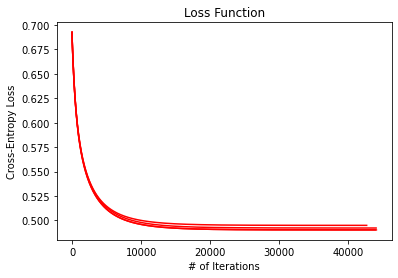

time: 41 s (started: 2023-02-20 01:46:54 +00:00)


In [ ]:
train_kd, test_kd = train_test_split(kd)
train_kd_x = train_kd.iloc[:,:-1].to_numpy()
train_kd_y = train_kd.iloc[:,-1].to_numpy()
test_kd_x = test_kd.iloc[:,:-1].to_numpy()
test_kd_y = test_kd.iloc[:,-1].to_numpy()

num_droped_features = train_kd_x.shape[1]//2
for i in range(num_droped_features):
  model = LogisticRegression()
  model.fit(train_kd_x,train_kd_y,.1)
  kdyh = model.predict(test_kd_x)
  min_index = np.argmin(np.abs(model.w[:-1])) #return min_index of absolute value of weight
  train_kd_x = np.delete(train_kd_x, min_index, axis = 1)
  test_kd_x = np.delete(test_kd_x, min_index, axis = 1)

kcv = KFoldCV()
print('Accuracy after selecting half of the features:')
kcv.Accu(train_kd_x, train_kd_y)

train_kd, test_kd = train_test_split(kd)
train_kd_x = train_kd.iloc[:,:-1].to_numpy()
train_kd_y = train_kd.iloc[:,-1].to_numpy()
test_kd_x = test_kd.iloc[:,:-1].to_numpy()
test_kd_y = test_kd.iloc[:,-1].to_numpy()

Accuracy after selecting half of the features:
terminated after 40216 iterations, with norm of the gradient equal to 9.999365398852733e-05
the weight found: array([-4.93805967,  3.02202134, -5.90518043, -3.5294772 ,  5.7011844 ,
        2.73412093])
terminated after 40644 iterations, with norm of the gradient equal to 9.999140484511823e-05
the weight found: array([-5.21125681,  3.20783431, -5.88520011, -3.72455585,  5.62358738,
        2.89468392])
terminated after 43863 iterations, with norm of the gradient equal to 9.999864118020027e-05
the weight found: array([-5.45306218,  3.50738975, -5.96672243, -3.66375927,  5.5933333 ,
        2.94822683])
terminated after 41892 iterations, with norm of the gradient equal to 9.999276905418087e-05
the weight found: array([-5.01570934,  3.33409491, -6.02373817, -3.88808887,  5.67152268,
        2.9363532 ])
terminated after 42810 iterations, with norm of the gradient equal to 9.999767988621975e-05
the weight found: array([-5.2189995 ,  3.27910956

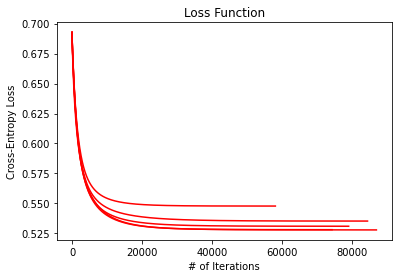

time: 2min 21s (started: 2023-02-20 01:47:35 +00:00)


In [ ]:
train_ww, test_ww = train_test_split(ww)
train_ww_x = train_ww.iloc[:,:-1].to_numpy()
train_ww_y = train_ww.iloc[:,-1].to_numpy()
test_ww_x = test_ww.iloc[:,:-1].to_numpy()
test_ww_y = test_ww.iloc[:,-1].to_numpy()

num_droped_features = train_ww_x.shape[1]//2
for i in range(num_droped_features):
  model = LogisticRegression()
  model.fit(train_ww_x,train_ww_y,.1)
  kdyh = model.predict(test_ww_x)
  min_index = np.argmin(np.abs(model.w[:-1])) #return min_index of absolute value of weight
  train_ww_x = np.delete(train_ww_x, min_index, axis = 1)
  test_ww_x = np.delete(test_ww_x, min_index, axis = 1)

kcv = KFoldCV()
print('Accuracy after selecting half of the features:')
kcv.Accu(train_ww_x, train_ww_y)

train_ww, test_ww = train_test_split(ww)
train_ww_x = train_ww.iloc[:,:-1].to_numpy()
train_ww_y = train_ww.iloc[:,-1].to_numpy()
test_ww_x = test_ww.iloc[:,:-1].to_numpy()
test_ww_y = test_ww.iloc[:,-1].to_numpy()

### Method 3: Unsupervised Feature Selection- Drop Highly-correlated features


In [ ]:
# unsupervised feature selection
# find the correlation matrix

cor_matrix = kd.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]

# drop the feature that has high correlation with others
kd1 = kd.drop(columns=to_drop)
kd1_data = kd1.values
kdx1 = kd1_data[:, :-1]

kcv = KFoldCV()
kcv.Accu(kdx1, kdy)

drop:
['DiabetesPedigreeFunction']
terminated after 42381 iterations, with norm of the gradient equal to 9.99972725275469e-05
the weight found: array([ 3.09905115,  7.62648189, -0.54759414, -0.1665292 , -2.28925899,
        4.89544239,  2.08255732,  1.77428905, -8.75091089])
terminated after 40070 iterations, with norm of the gradient equal to 9.999931445653446e-05
the weight found: array([ 2.89967951,  6.87749323, -0.27158017, -0.14789519, -1.68789711,
        5.02105032,  2.44480546,  1.63190583, -8.49323152])
terminated after 44198 iterations, with norm of the gradient equal to 9.999521801682453e-05
the weight found: array([ 3.40235075,  6.80094289, -0.33481506, -0.35675788, -1.37664548,
        5.9228128 ,  2.55817876,  0.96072581, -8.70210258])
terminated after 43767 iterations, with norm of the gradient equal to 9.999702778848089e-05
the weight found: array([ 3.07467285,  7.50226797, -0.61576245, -0.21364909, -1.90381138,
        5.47791942,  2.34988982,  1.14795089, -8.7194479 ]

In [ ]:
# unsupervised feature selection
# find the correlation matrix

cor_matrix = ww.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]

# drop the feature that has high correlation with others
ww1 = ww.drop(columns=to_drop)
ww1_data = ww1.values
wwx1 = ww1_data[:, :-1]

kcv = KFoldCV()
kcv.Accu(wwx1, wwy)

terminated after 53069 iterations, with norm of the gradient equal to 9.999466930127986e-05
the weight found: array([-0.99024581, -5.5663562 ,  0.4630935 , -5.18324157, -1.26354202,
        5.01088335,  1.71991044])
terminated after 62775 iterations, with norm of the gradient equal to 9.999581781394903e-05
the weight found: array([-1.02786481, -5.34369338,  0.42422526, -6.70894203, -1.02588973,
        6.16363891,  1.58088927])
terminated after 55157 iterations, with norm of the gradient equal to 9.99982406336404e-05
the weight found: array([-0.13530717, -4.45156149,  0.65443703, -5.61569369, -1.40830117,
        6.19970302,  0.97279026])
terminated after 53128 iterations, with norm of the gradient equal to 9.999425546910052e-05
the weight found: array([ 0.15741499, -4.29774812,  0.51541865, -5.4345595 , -1.39305001,
        5.88661864,  0.88995714])
terminated after 53001 iterations, with norm of the gradient equal to 9.999922538665986e-05
the weight found: array([ 0.76909175, -5.4120

### Method 4: Supervised Feature Selection- Recursive Feature Elimination

In [ ]:
model = LogisticRegression(verbose = False, draw_loss=False, max_iters = 3000)
train_kd, test_kd = train_test_split(kd)
test_kd_x = test_kd.iloc[:,:-1].to_numpy()
test_kd_y = test_kd.iloc[:,:-1].to_numpy()
train_kd_x = train_kd.iloc[:,:-1].to_numpy()
train_kd_y = train_kd.iloc[:,-1].to_numpy()
selected_features = 3

for i in range(selected_features):
  scores = np.zeros(train_kd_x.shape[1])

  for j in range(train_kd_x.shape[1]):
    dropped = np.delete(train_kd_x, j, axis = 1)
    model.fit(dropped, train_kd_y, .1)
    y_pred = model.predict(dropped)
    score = np.mean((train_kd_y - y_pred) ** 2)
    inserted = np.insert(dropped, j, train_kd_x[:, j], axis=1)
    scores[j] = score

  least_important = np.argmin(scores)
  train_kd_x = np.delete(train_kd_x, least_important, axis = 1)

kcv = KFoldCV()
kcv.Accu(train_kd_x, train_kd_y)

train_kd, test_kd = train_test_split(kd)
test_kd_x = test_kd.iloc[:,:-1].to_numpy()
test_kd_y = test_kd.iloc[:,:-1].to_numpy()
train_kd_x = train_kd.iloc[:,:-1].to_numpy()
train_kd_y = train_kd.iloc[:,-1].to_numpy()

terminated after 29163 iterations, with norm of the gradient equal to 9.99890553740075e-05
the weight found: array([ 1.41688265,  7.42136888, -0.3112858 , -2.84182081,  1.77468043,
        1.40512171, -5.21298669])
terminated after 31590 iterations, with norm of the gradient equal to 9.999902873019127e-05
the weight found: array([ 1.44575174,  7.87172358, -0.6781959 , -2.79770636,  1.94789108,
        1.88405167, -5.24423176])
terminated after 33785 iterations, with norm of the gradient equal to 9.999622301268796e-05
the weight found: array([ 1.34280473,  8.64683579, -0.74329747, -3.51651595,  1.52692692,
        2.2041427 , -5.80921961])
terminated after 29957 iterations, with norm of the gradient equal to 9.998735259375e-05
the weight found: array([ 1.47686262,  8.12479666, -0.58199938, -2.50326938,  1.79333697,
        1.72287749, -5.71876115])
terminated after 30060 iterations, with norm of the gradient equal to 9.998656061648696e-05
the weight found: array([ 1.2951487 ,  8.1093900

In [ ]:
train_ww, test_ww = train_test_split(ww)
train_ww_x = train_ww.iloc[:,:-1].to_numpy()
train_ww_y = train_ww.iloc[:,-1].to_numpy()
test_ww_x = test_ww.iloc[:,:-1].to_numpy()
test_ww_y = test_ww.iloc[:,-1].to_numpy()
selected_features = 3
model = LogisticRegression(verbose = False, draw_loss=False, max_iters = 3000)
for i in range(selected_features):
  scores = np.zeros(train_ww_x.shape[1])

  for j in range(train_ww_x.shape[1]):
    dropped = np.delete(train_ww_x, j, axis = 1)
    model.fit(dropped, train_ww_y, .1)
    y_pred = model.predict(dropped)
    score = np.mean((train_ww_y - y_pred) ** 2)
    inserted = np.insert(dropped, j, train_ww_x[:, j], axis=1)
    scores[j] = score

  least_important = np.argmin(scores)
  train_ww_x = np.delete(train_ww_x, least_important, axis = 1)

kcv = KFoldCV()
kcv.Accu(train_ww_x, train_ww_y)

train_ww, test_ww = train_test_split(ww)
train_ww_x = train_ww.iloc[:,:-1].to_numpy()
train_ww_y = train_ww.iloc[:,-1].to_numpy()
test_ww_x = test_ww.iloc[:,:-1].to_numpy()
test_ww_y = test_ww.iloc[:,-1].to_numpy()

terminated after 54435 iterations, with norm of the gradient equal to 9.999430388636378e-05
the weight found: array([ 3.16511189, -3.88804599,  3.29046365,  1.95783718, -7.09126264,
       -6.05309135,  5.48498425,  2.41837534])
terminated after 55460 iterations, with norm of the gradient equal to 9.999442804124265e-05
the weight found: array([ 3.14706409, -4.1821486 ,  3.59752192,  1.67445922, -6.74824984,
       -6.3317889 ,  5.41775385,  2.63752544])
terminated after 60859 iterations, with norm of the gradient equal to 9.999480405603431e-05
the weight found: array([ 3.60260758, -4.28152929,  4.03451602,  2.33906698, -7.37523689,
       -6.58114198,  5.40039184,  2.58433556])
terminated after 56451 iterations, with norm of the gradient equal to 9.999977278570725e-05
the weight found: array([ 2.85431319, -4.02916355,  3.40965407,  2.6115609 , -7.8806543 ,
       -6.0726134 ,  5.44819789,  2.55538408])
terminated after 57406 iterations, with norm of the gradient equal to 9.999960343373

### Method 5: Feature Insertion
Training with three added features by taking the three features with highest weights and square them.

terminated after 100000 iterations, with norm of the gradient equal to 0.0001765025567178
the weight found: array([-0.57794215,  5.31735643,  3.37439535,  1.5600868 ,  3.65814752,
       -1.76585862,  0.74144946, -3.71790634,  1.59780671,  1.19410697,
        2.00174332,  1.07446214, -6.04159627])
terminated after 100000 iterations, with norm of the gradient equal to 0.0001500427240059612
the weight found: array([-0.89467671,  3.54504352,  4.03979254,  1.44463791,  3.55625514,
       -1.83518604, -0.22174771, -3.15835596,  2.53946744,  1.64373788,
        2.10459947,  1.30982602, -5.98507275])
terminated after 73224 iterations, with norm of the gradient equal to 9.99993727005763e-05
the weight found: array([ 2.39793248,  4.31509148,  2.67048119,  1.04251618,  1.71770337,
       -2.69923998,  0.33996845, -4.40212741,  2.76888604,  1.24373592,
        2.9402079 ,  1.37644836, -4.9599992 ])
terminated after 100000 iterations, with norm of the gradient equal to 0.00014992878223434933
the w

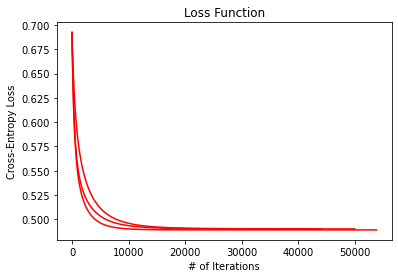

time: 1min 11s (started: 2023-02-20 01:58:26 +00:00)


In [ ]:
num_features = 3
train_kd, test_kd = train_test_split(kd)
test_kd_x = test_kd.iloc[:,:-1].to_numpy()
test_kd_y = test_kd.iloc[:,:-1].to_numpy()
train_kd_x = train_kd.iloc[:,:-1].to_numpy()
train_kd_y = train_kd.iloc[:,-1].to_numpy()

for i in range(num_features):
  model = LogisticRegression()
  model.fit(train_kd_x,train_kd_y,.1)
  kdyh = model.predict(test_kd_x)
  max_index = np.argmax(np.abs(model.w[:-1])) #return min_index of absolute value of weight
  squared_column = train_kd_x[:, max_index] ** 2
  sc2 = test_kd_x[:, max_index] **2
  train_kd_x = np.insert(train_kd_x, 0, squared_column, axis=1)
  test_kd_x = np.insert(test_kd_x, 0, sc2, axis=1)

kcv = KFoldCV()
kcv.Accu(train_kd_x, train_kd_y)
train_kd, test_kd = train_test_split(kd)
test_kd_x = test_kd.iloc[:,:-1].to_numpy()
test_kd_y = test_kd.iloc[:,:-1].to_numpy()
train_kd_x = train_kd.iloc[:,:-1].to_numpy()
train_kd_y = train_kd.iloc[:,-1].to_numpy()

terminated after 100000 iterations, with norm of the gradient equal to 0.0005414683623032584
the weight found: array([-2.45901813, -2.45901813, -2.45901813,  5.66742465, -3.77263618,
       -0.45948734,  3.51689742, -2.86524033,  1.49829237, -5.97707878,
       -6.97277246,  2.87897407, 10.85097314,  0.44328085])
terminated after 100000 iterations, with norm of the gradient equal to 0.0005737991713615341
the weight found: array([-2.70193297, -2.70193297, -2.70193297,  5.08469182, -4.11628606,
       -0.51899613,  3.79866332, -2.84624083,  1.20338814, -5.76634716,
       -6.97543635,  2.14897932, 11.23874221,  1.03934879])
terminated after 100000 iterations, with norm of the gradient equal to 0.000537176784870288
the weight found: array([-2.52644056, -2.52644056, -2.52644056,  6.15902654, -4.18275476,
       -0.27620089,  4.06604374, -2.44719832,  1.94795222, -6.35645093,
       -7.53818846,  3.19577663, 10.70287165,  0.41215571])
terminated after 100000 iterations, with norm of the gra

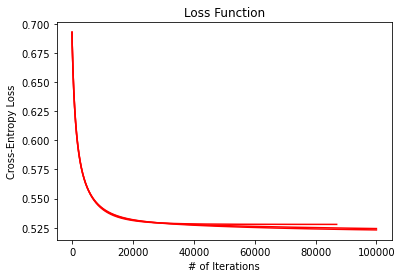

time: 5min 31s (started: 2023-02-20 02:18:11 +00:00)


In [ ]:
num_features = 3
train_ww, test_ww = train_test_split(ww)
train_ww_x = train_ww.iloc[:,:-1].to_numpy()
train_ww_y = train_ww.iloc[:,-1].to_numpy()
test_ww_x = test_ww.iloc[:,:-1].to_numpy()
test_ww_y = test_ww.iloc[:,-1].to_numpy()

for i in range(num_features):
  model = LogisticRegression()
  model.fit(train_ww_x,train_ww_y,.1)
  kdyh = model.predict(test_ww_x)
  max_index = np.argmax(np.abs(model.w[:-1])) #return min_index of absolute value of weight
  squared_column = train_ww_x[:, max_index] ** 2
  sc2 = test_ww_x[:, max_index] **2
  train_ww_x = np.insert(train_ww_x, 0, squared_column, axis=1)
  test_ww_x = np.insert(test_ww_x, 0, sc2, axis=1)

kcv = KFoldCV()
kcv.Accu(train_ww_x, train_ww_y)
train_ww, test_ww = train_test_split(ww)
train_ww_x = train_ww.iloc[:,:-1].to_numpy()
train_ww_y = train_ww.iloc[:,-1].to_numpy()
test_ww_x = test_ww.iloc[:,:-1].to_numpy()
test_ww_y = test_ww.iloc[:,-1].to_numpy()

### Exploring learning rate

We are interested in seeing how learning rate affects the training process. We will plot the learning rate versus number of iterations and (separately) accuracy.

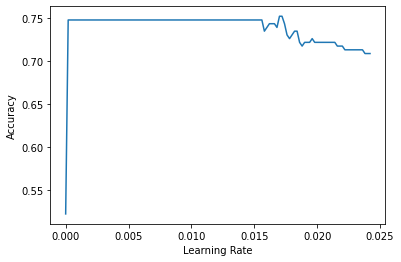

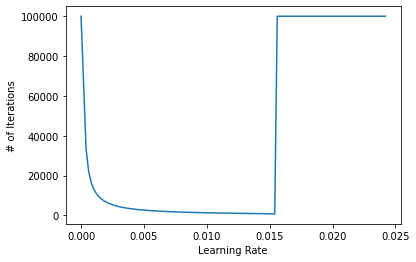

time: 5min 22s (started: 2023-02-20 02:23:43 +00:00)


In [ ]:
def lrplot (x, y):
  acc_lr_plt = []
  n_iter = []
  lr_plt= np.arange(0.0, 8/kdx.shape[0], 0.0002)
  lr = lr_plt*kdx.shape[0]
  for i in lr:
    model = LogisticRegression(verbose=False, max_iters=1e5, draw_loss=False)
    model.fit(x,y,i)
    yh = model.predict(x)
    acc_lr_plt.append(Accu_eval(y,yh))
    n_iter.append(model.t)

  plt.figure()
  plt.plot(lr_plt,acc_lr_plt)
  plt.xlabel("Learning Rate")
  plt.ylabel("Accuracy")
  plt.show()

  plt.figure()
  plt.plot(lr_plt,n_iter)
  plt.xlabel("Learning Rate")
  plt.ylabel("# of Iterations")
  plt.show()


lrplot(train_kd_x, train_kd_y)


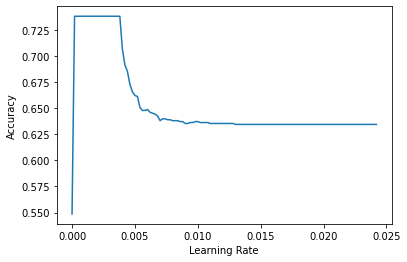

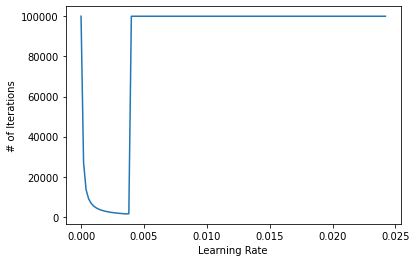

time: 44min 12s (started: 2023-02-20 02:29:06 +00:00)


In [ ]:
def lrplot (x, y):
  acc_lr_plt = []
  n_iter = []
  lr_plt= np.arange(0.0, 8/kdx.shape[0], 0.0002)
  lr = lr_plt*wwx.shape[0]
  for i in lr:
    model = LogisticRegression(verbose=False, max_iters=1e5, draw_loss = False)
    model.fit(x,y,i)
    yh = model.predict(x)
    acc_lr_plt.append(Accu_eval(y,yh))
    n_iter.append(model.t)

  plt.figure()
  plt.plot(lr_plt,acc_lr_plt)
  plt.xlabel("Learning Rate")
  plt.ylabel("Accuracy")
  plt.show()

  plt.figure()
  plt.plot(lr_plt,n_iter)
  plt.xlabel("Learning Rate")
  plt.ylabel("# of Iterations")
  plt.show()


lrplot(train_ww_x, train_ww_y)

### Final Testing
Now that we have explored the logistic regression model, with variations to the features in an attempt to improve performance, we can evaluate the final performance of the model.

In [ ]:
# Divide kd into train and test datasets
train_kd, test_kd = train_test_split(kd)

train_kd_x = train_kd.iloc[:,:-1].to_numpy()
train_kd_y = train_kd.iloc[:,-1].to_numpy()
test_kd_x = test_kd.iloc[:,:-1].to_numpy()
test_kd_y = test_kd.iloc[:,-1].to_numpy()

time: 4.35 ms (started: 2023-02-20 03:34:58 +00:00)


In [ ]:
train_kd

,Pregnancies,Glucose,BloodPressure,HeartRate,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
9,0.705880,0.75879,0.57377,0.40404,0.320330,0.62295,0.283520,0.283330,0.35385,1
164,0.647060,0.67839,0.00000,0.00000,0.000000,0.77943,0.213490,0.316670,0.63077,1
139,0.000000,0.56784,0.62295,0.00000,0.000000,0.49627,0.085397,0.033333,0.26154,1
46,0.058824,0.83920,0.60656,0.17172,0.170210,0.34873,0.157560,0.200000,0.35385,1
94,0.352940,0.74372,0.59016,0.35354,0.000000,0.50075,0.234420,0.483330,0.41538,1
...,...,...,...,...,...,...,...,...,...,...
61,0.235290,0.62814,0.65574,0.00000,0.000000,0.48137,0.195560,0.100000,0.47692,1
150,1.000000,0.81910,0.59016,0.41414,0.134750,0.60954,0.315540,0.433330,0.41538,1
47,0.000000,0.89950,0.40984,0.36364,0.187940,0.56334,0.160970,0.016667,0.63077,1
240,0.529410,0.62312,0.57377,0.33333,0.475180,0.52757,0.087105,0.216670,0.32308,0


time: 15.1 ms (started: 2023-02-20 03:35:01 +00:00)


In [ ]:
train_kd_x[0]

array([0.70588, 0.75879, 0.57377, 0.40404, 0.32033, 0.62295, 0.28352,
       0.28333, 0.35385])

time: 4.24 ms (started: 2023-02-20 03:35:03 +00:00)


In [ ]:
test_kd_x.shape

(100, 9)

time: 2.8 ms (started: 2023-02-20 03:35:05 +00:00)


In [ ]:
train_kd_x.shape

(230, 9)

time: 3.34 ms (started: 2023-02-20 03:35:07 +00:00)


In [ ]:
# K-fold cross validation class
class KFoldCV:
    def __init__(self, k=10):
        self.k = k

    def Accu(self, kdx1, kdy, y=None):
        fold_size = kdx1.shape[0]//self.k
        scores = []

        # Loop over the folds
        for i in range(self.k):
            # Split the data into training and validation sets
            X_train = np.concatenate((kdx1[:i*fold_size, :], kdx1[(i+1)*fold_size:, :]), axis=0)
            y_train = np.concatenate((kdy[:i*fold_size], kdy[(i+1)*fold_size:]), axis=0)
            X_val = kdx1[i*fold_size:(i+1)*fold_size, :]
            y_val = kdy[i*fold_size:(i+1)*fold_size]

            # Train your model on the training data
            model = LogisticRegression(verbose=False, max_iters = 1e5, draw_loss = False)
            model.fit(X_train, y_train, .01)
            y_pred = model.predict(X_val)
            score = Accu_eval(y_val, y_pred) # look at error metrics, not loss
            scores.append(score)

        y_pred = model.predict(test_kd_x)
        score = Accu_eval(test_kd_y, y_pred)
        print(score)

time: 3.92 ms (started: 2023-02-20 03:46:24 +00:00)


In [ ]:
# dropping smallest feature

train_kd_x = train_kd.iloc[:,:-1].drop('HeartRate', axis=1).to_numpy()
train_kd_y = train_kd.iloc[:,-1].to_numpy()
test_kd_x = train_kd.iloc[:,:-1].drop('HeartRate', axis=1).to_numpy()
test_kd_y = train_kd.iloc[:,-1].to_numpy()

time: 4.23 ms (started: 2023-02-20 03:46:27 +00:00)


In [ ]:
kcv = KFoldCV()
kcv.Accu(train_kd_x, train_kd_y)

terminated after 100000 iterations, with norm of the gradient equal to 0.0037854741848927036
the weight found: array([ 1.37237489,  5.95484936, -1.55944419, -2.32237892,  4.81471843,
        1.19072408,  1.79192217,  0.67477962, -6.25856654])
terminated after 100000 iterations, with norm of the gradient equal to 0.0036598741789009835
the weight found: array([ 1.32288438,  6.22651488, -1.761936  , -2.17152141,  4.10592013,
        1.55341667,  2.07317546,  0.92880569, -6.01637356])
terminated after 100000 iterations, with norm of the gradient equal to 0.0039496569229439905
the weight found: array([ 1.12037319,  6.64405928, -2.10380145, -2.70073587,  4.30337226,
        1.16143359,  2.555382  ,  0.80310312, -6.23459971])
terminated after 100000 iterations, with norm of the gradient equal to 0.0035502678354284796
the weight found: array([ 1.26539416,  6.59114918, -1.67339396, -2.12418124,  4.1249189 ,
        1.46463057,  1.97861474,  0.09049528, -6.1534918 ])
terminated after 100000 iter

In [ ]:
# Divide kd into train and test datasets
train_ww, test_ww = train_test_split(ww)

train_ww_x = train_ww.iloc[:,:-1].to_numpy()
train_ww_y = train_ww.iloc[:,-1].to_numpy()
test_ww_x = test_ww.iloc[:,:-1].to_numpy()
test_ww_y = test_ww.iloc[:,-1].to_numpy()

time: 4.21 ms (started: 2023-02-20 03:17:28 +00:00)


In [ ]:
# K-fold cross validation class
class KFoldCV:
    def __init__(self, k=10):
        self.k = k

    def Accu(self, kdx1, kdy, y=None):
        fold_size = kdx1.shape[0]//self.k
        scores = []

        # Loop over the folds
        for i in range(self.k):
            # Split the data into training and validation sets
            X_train = np.concatenate((kdx1[:i*fold_size, :], kdx1[(i+1)*fold_size:, :]), axis=0)
            y_train = np.concatenate((kdy[:i*fold_size], kdy[(i+1)*fold_size:]), axis=0)
            X_val = kdx1[i*fold_size:(i+1)*fold_size, :]
            y_val = kdy[i*fold_size:(i+1)*fold_size]

            # Train your model on the training data
            model = LogisticRegression(verbose=False, max_iters = 1e5, draw_loss = False)
            model.fit(X_train, y_train, .01)
            y_pred = model.predict(X_val)
            score = Accu_eval(y_val, y_pred) # look at error metrics, not loss
            scores.append(score)

        y_pred = model.predict(test_ww_x)
        score = Accu_eval(test_ww_y, y_pred)
        print("final is")
        print(score)

time: 2.76 ms (started: 2023-02-20 04:01:06 +00:00)


0.7


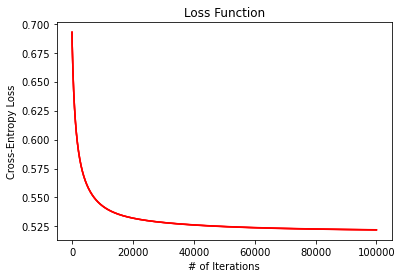

time: 5min 37s (started: 2023-02-20 03:55:27 +00:00)


In [ ]:
# squaring 3 biggest features
num_features = 3

for i in range(num_features):
  model = LogisticRegression()
  model.fit(train_ww_x,train_ww_y,.1)
  kdyh = model.predict(test_ww_x)
  max_index = np.argmax(np.abs(model.w[:-1])) #return min_index of absolute value of weight
  squared_column = train_ww_x[:, max_index] ** 2
  sc2 = test_ww_x[:, max_index] **2
  train_ww_x = np.insert(train_ww_x, 0, squared_column, axis=1)
  test_ww_x = np.insert(test_ww_x, 0, sc2, axis=1)

kcv = KFoldCV()
kcv.Accu(train_ww_x, train_ww_y)